# Unsupervised Learning - Clustering Handwritten Digits

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import pylab as pl

# Import digits dataset and show some of them

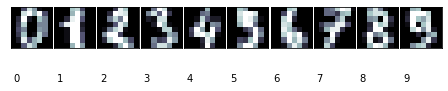

In [3]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
digits = load_digits()
data = scale(digits.data)

def print_digits(images,y,max_n=10):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    i = 0
    while i < max_n and i < images.shape[0]:
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        # label the image with the target value
        p.text(0, 14, str(y[i]))
        i = i + 1
    
print_digits(digits.images, digits.target, max_n=10)


# Build training and test set

n_digits: 10, 	 n_samples 1347, 	 n_features 64


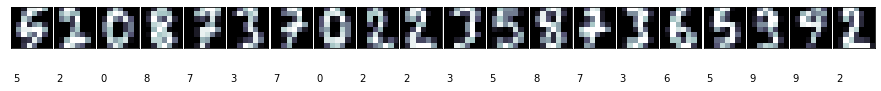

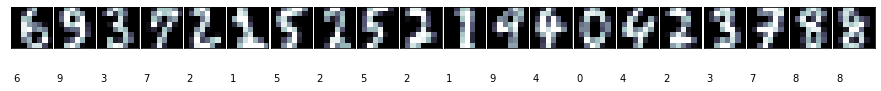

In [10]:
# Training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(
        data, digits.target, digits.images,  test_size=0.25, random_state=42)

n_samples, n_features = X_train.shape
n_digits = len(np.unique(y_train))
labels = y_train


print_digits(images_train, y_train, max_n=20)
print_digits(images_test, y_test, max_n=20)

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


## K-Means

Train a KMeans classifier, show the clusters. 

(1347,)
[3 2 0 6 8 6 2 3 3]


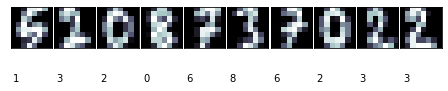

In [12]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=10, random_state=42)
clf.fit(X_train)
print(clf.labels_.shape)
print(clf.labels_[1:10])
print_digits(images_train, clf.labels_, max_n=10)


## Predict and show predicted clusters.

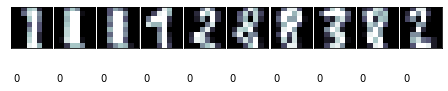

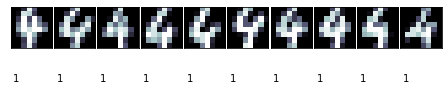

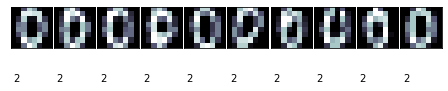

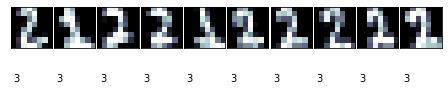

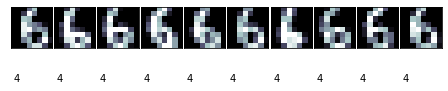

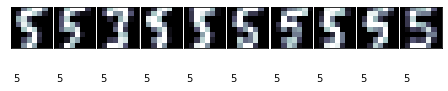

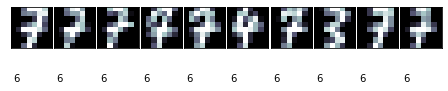

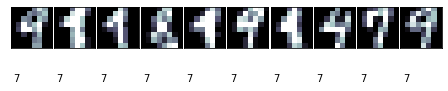

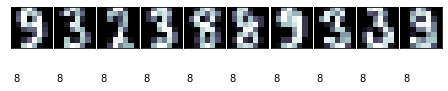

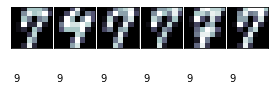

In [13]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)

for i in range(10):
     print_cluster(images_test, y_pred, i)


## Show different performance metrics, compared with "original" clusters (using the knowb number class)

In [15]:
from sklearn import metrics
print("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print( "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred))) 
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
print ("Confusion matrix")
print(metrics.confusion_matrix(y_test, y_pred))

Addjusted rand score:0.57
Homogeneity score:0.69 
Completeness score: 0.73 
Confusion matrix
[[ 0  0 43  0  0  0  0  0  0  0]
 [20  0  0  7  0  0  0 10  0  0]
 [ 5  0  0 31  0  0  0  1  1  0]
 [ 1  0  0  1  0  1  4  0 39  0]
 [ 1 50  0  0  0  0  1  2  0  1]
 [ 1  0  0  0  1 41  0  0 16  0]
 [ 0  0  1  0 44  0  0  0  0  0]
 [ 0  0  0  0  0  1 34  1  0  5]
 [21  0  0  0  0  3  1  2 11  0]
 [ 0  0  0  0  0  2  3  3 40  0]]


## Show clusters and centroids (taken from [the scikit-learn tutorial](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html))

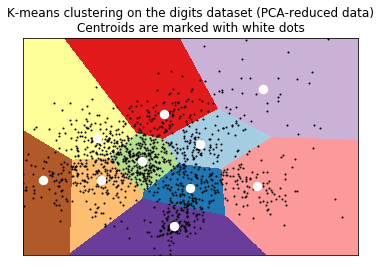

In [16]:
from sklearn import decomposition
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

kmeans = cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_X_train)
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=plt.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

plt.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_

plt.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
         'Centroids are marked with white dots')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Affinity Propagation

Try now using Affinity Propagation

In [18]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print(aff.cluster_centers_indices_.shape)




(112,)


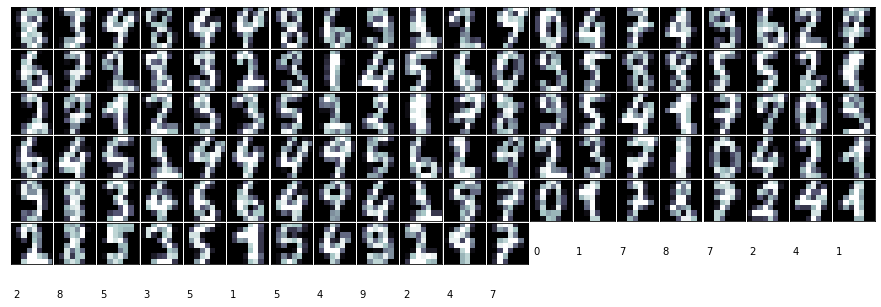

In [19]:
print_digits(images_train[aff.cluster_centers_indices_], y_train[aff.cluster_centers_indices_], max_n=aff.cluster_centers_indices_.shape[0])

## clustering method: MeanShift()

In [21]:
#MeanShift
ms = cluster.MeanShift()
ms.fit(X_train)
print(ms.cluster_centers_)

[[ 0.         -0.06920891 -0.00466096 ... -0.00320756 -0.05788662
  -0.10216336]
 [ 0.         -0.33501649 -1.07875445 ... -0.87280614 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.93131483 ...  1.37732909  1.53211418
  -0.01675789]
 ...
 [ 0.         -0.33501649 -1.09493684 ... -0.80760583 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.03999823 -0.5056698
  -0.19600752]]


In [23]:
print(ms.cluster_centers_.shape)


(18, 64)


## Mixture of Gaussian Models

Now, try a Mixture of Gaussian Models

Use a heldout dataset to estimate covariance type

In [26]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GaussianMixture(n_components=n_digits, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print ("Adjusted rand score for covariance={}:{:.2}".format(covariance_type, metrics.adjusted_rand_score(y_test_heldout, y_pred)))


Adjusted rand score for covariance=spherical:0.45
Adjusted rand score for covariance=tied:0.43
Adjusted rand score for covariance=diag:0.38
Adjusted rand score for covariance=full:0.4


Train!

In [28]:
gm = mixture.GaussianMixture(n_components=n_digits, covariance_type='tied', random_state=42)
gm.fit(X_train)

GaussianMixture(covariance_type='tied', init_params='kmeans', max_iter=100,
                means_init=None, n_components=10, n_init=1,
                precisions_init=None, random_state=42, reg_covar=1e-06,
                tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                weights_init=None)

Addjusted rand score:0.46
Homogeneity score:0.62 
Completeness score: 0.68 
Confusion matrix
[[ 1  0  0 42  0  0  0  0  0  0]
 [ 0  0  1  0 30  0  6  0  0  0]
 [ 0  0 23  0  2  0  5  0  8  0]
 [ 0  0 11  0  0 31  1  0  3  0]
 [46  4  0  0  2  0  0  3  0  0]
 [ 0  0 21  0  0 25  0  0 11  2]
 [ 0  0  0  0  0  1  0  0  0 44]
 [ 0  2  3  0  1  0  0 34  1  0]
 [ 0  0 26  0  2 10  0  0  0  0]
 [ 0  0  5  0  3 39  0  0  1  0]]


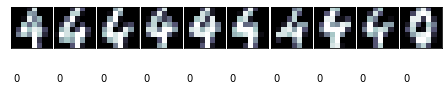

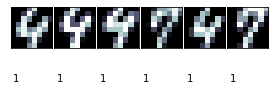

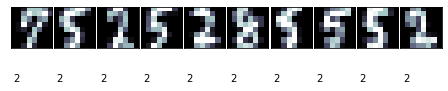

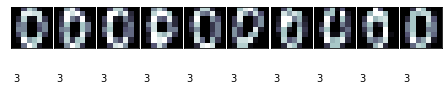

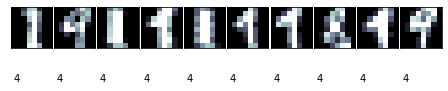

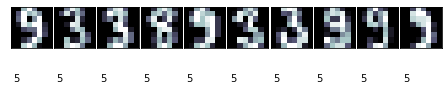

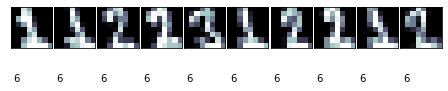

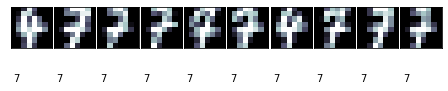

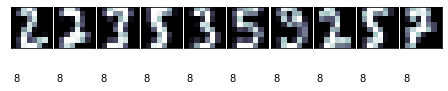

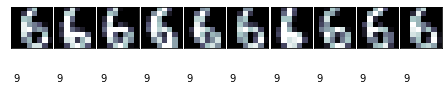

In [30]:
# Print train clustering and confusion matrix
y_pred = gm.predict(X_test)
print("Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred)))
print ("Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred))) 
print ("Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred)))
for i in range(10):
     print_cluster(images_test, y_pred, i)
print ("Confusion matrix")
print (metrics.confusion_matrix(y_test, y_pred))

Predict!

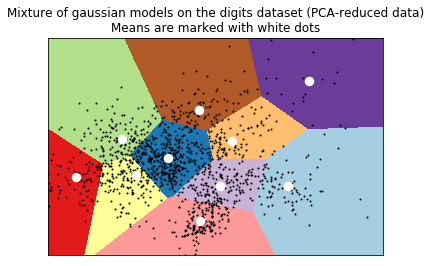

In [31]:
pl=plt
from sklearn import decomposition
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = decomposition.PCA(n_components=2).fit(X_train)
reduced_X_train = pca.transform(X_train)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, m_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will asign a color to each
# Taken from 
x_min, x_max = reduced_X_train[:, 0].min() + 1, reduced_X_train[:, 0].max() - 1
y_min, y_max = reduced_X_train[:, 1].min() + 1, reduced_X_train[:, 1].max() - 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

gm.fit(reduced_X_train)
#print np.c_[xx.ravel(),yy.ravel()]
Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1)
pl.clf()
pl.imshow(Z, interpolation='nearest',
          extent=(xx.min(), xx.max(), yy.min(), yy.max()),
          cmap=pl.cm.Paired,
          aspect='auto', origin='lower')
#print reduced_X_train.shape

pl.plot(reduced_X_train[:, 0], reduced_X_train[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = gm.means_

pl.scatter(centroids[:, 0], centroids[:, 1],
           marker='.', s=169, linewidths=3,
           color='w', zorder=10)

pl.title('Mixture of gaussian models on the digits dataset (PCA-reduced data)\n'
         'Means are marked with white dots')
pl.xlim(x_min, x_max)
pl.ylim(y_min, y_max)
pl.xticks(())
pl.yticks(())
pl.show()